#Import

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# from pandas_profiling import ProfileReport

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

#Load Data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/BryanT05/Machine-Learning-Bootcamp/main/Final%20Project/healthcare-dataset-stroke-data.csv')
X = df.drop(columns=['id', 'stroke'])
y = df['stroke']
X_train, X_val, y_train, y_val = train_test_split(X,y, random_state = 42, stratify = y)
df_train = X_train.join(y_train)

#Input missing

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3832 entries, 837 to 5052
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3832 non-null   object 
 1   age                3832 non-null   float64
 2   hypertension       3832 non-null   int64  
 3   heart_disease      3832 non-null   int64  
 4   ever_married       3832 non-null   object 
 5   work_type          3832 non-null   object 
 6   Residence_type     3832 non-null   object 
 7   avg_glucose_level  3832 non-null   float64
 8   bmi                3674 non-null   float64
 9   smoking_status     3832 non-null   object 
 10  stroke             3832 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 519.2+ KB


In [ ]:
df_train.gender.value_counts()

Female    2242
Male      1589
Other        1
Name: gender, dtype: int64

We will replace other to female which is the mode

In [ ]:
df_train.smoking_status.value_counts()

never smoked       1413
Unknown            1171
formerly smoked     670
smokes              578
Name: smoking_status, dtype: int64

Unknown is the same as None or missing data, but there is too many so we will make it as its own category

In [ ]:
df_train.gender.replace('Other','Female',inplace = True)
df_train.gender.value_counts()

Female    2243
Male      1589
Name: gender, dtype: int64

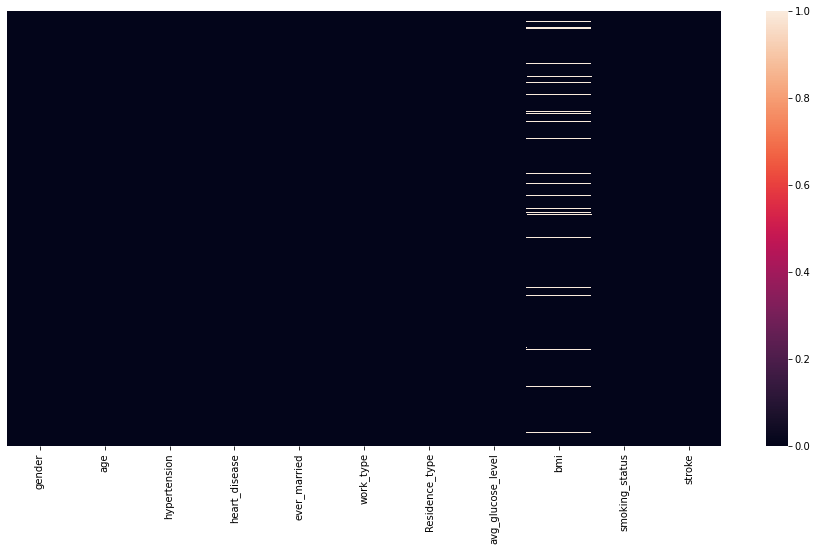

In [ ]:
plt.figure(figsize = (16,8))
sns.heatmap(df_train.isnull(), yticklabels=False)

We will replace bmi with its mean

In [ ]:
df_train.bmi.fillna(df_train['bmi'].median(), inplace = True)

In [ ]:
categorical = ['gender','hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status']
numerical = ['age', 'avg_glucose_level', 'bmi']

# def baseline_model(X, y, model):
#    transformer = ColumnTransformer(transformers=[('imp',SimpleImputer(strategy='median'),numerical),('o',OneHotEncoder(),categorical)])
#    pipeline = Pipeline(steps=[('t', transformer),('p',PowerTransformer(method='yeo-johnson')),('m', model)])    
#    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#    scores = cross_val_score(pipeline, X, y, scoring='roc_auc', cv=cv, n_jobs=-1)
#    return scores

# model = LogisticRegression()
# scores = baseline_model(X_train, y_train, model)
# print('Mean roc_auc: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

In [ ]:
df_train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
837,Female,39.0,0,0,No,Govt_job,Urban,79.44,22.7,never smoked,0
2899,Male,55.0,0,0,Yes,Private,Urban,68.79,27.0,never smoked,0
708,Female,59.0,0,0,Yes,Private,Urban,240.71,43.9,formerly smoked,0
3144,Female,79.0,0,0,No,Self-employed,Rural,82.07,30.4,Unknown,0
4920,Female,75.0,0,0,Yes,Private,Rural,68.38,33.8,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
1434,Female,45.0,0,0,Yes,Private,Urban,92.86,35.1,formerly smoked,0
461,Female,16.0,0,0,No,children,Rural,113.47,19.5,Unknown,0
1052,Female,61.0,0,0,Yes,Private,Rural,78.65,36.2,formerly smoked,0
1757,Male,31.0,0,0,Yes,Private,Urban,74.05,26.0,Unknown,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3832 entries, 837 to 5052
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3832 non-null   object 
 1   age                3832 non-null   float64
 2   hypertension       3832 non-null   int64  
 3   heart_disease      3832 non-null   int64  
 4   ever_married       3832 non-null   object 
 5   work_type          3832 non-null   object 
 6   Residence_type     3832 non-null   object 
 7   avg_glucose_level  3832 non-null   float64
 8   bmi                3832 non-null   float64
 9   smoking_status     3832 non-null   object 
 10  stroke             3832 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 519.2+ KB


In [ ]:
df_train = pd.get_dummies(df_train)

##Normalization

In [ ]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(df_train)

# transform training data
df_train_norm = norm.transform(df_train)

# transform testing dataabs
# X_test_norm = norm.transform(X_test)

In [ ]:
col = df_train.columns.tolist()

In [ ]:
df_train_normalized = pd.DataFrame(df_train_norm, columns= col)

In [ ]:
df_train_normalized.isnull().sum()

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Female                     0
gender_Male                       0
ever_married_No                   0
ever_married_Yes                  0
work_type_Govt_job                0
work_type_Never_worked            0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Rural              0
Residence_type_Urban              0
smoking_status_Unknown            0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

In [ ]:
df_train_normalized.to_csv('df_train_normalized.csv',index = False)

##Standarization

In [ ]:
# data standardization with  sklearn
from sklearn.preprocessing import StandardScaler

# copy of datasets
df_train_stand = df_train.copy()
# numerical features
num_cols = ['age', 'avg_glucose_level', 'bmi']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(df_train_stand[[i]])
    
    # transform the training data column
    df_train_stand[i] = scale.transform(df_train_stand[[i]])
    
    # transform the testing data column
    # X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [ ]:
df_train_stand.shape

(3832, 21)

In [ ]:
df_train_stand.to_csv('df_train_standarize.csv', index = False)

In [ ]:
df_train.to_csv('df_train.csv', index = False)

##Preprocess unseen data

In [ ]:
df_val = X_val.join(y_val)

In [ ]:
df_val.gender.value_counts()

Female    752
Male      526
Name: gender, dtype: int64

In [ ]:
df_val.bmi.fillna(df_val['bmi'].median(), inplace = True)

In [ ]:
df_val = pd.get_dummies(df_val)

In [ ]:
df_val

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1602,62.0,0,0,73.44,23.4,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0
2966,80.0,1,0,232.12,28.8,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0
1433,54.0,0,0,86.26,35.1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0
2738,43.0,0,0,110.42,32.6,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
916,63.0,0,0,57.82,28.8,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,28.0,0,0,75.53,34.9,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
4859,43.0,0,0,66.22,34.4,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0
4701,50.0,0,0,120.44,30.3,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0
1834,37.0,0,0,90.95,24.6,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1


In [ ]:
df_val.to_csv('df_val.csv',index = False)